# 데이터 분석 연습 001 : 따릉이

In [61]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

import numpy as np
import pandas as pd
import seaborn as sns

# Jupyter notebook 에서 그래프 확인 위한 설정
%matplotlib inline

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False 

import FinanceDataReader as fdr

In [62]:
import os
datapath = os.path.join(r'C:/DevRoot/dataset/ddaleung/', 'train.csv')
df = pd.read_csv(datapath)
df

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053


1. bicycle_train.csv : 학습 데이터
    - date_time : 일별 날짜
    - wind_direction: 풍향 (degree)
    - sky_condition : 하늘 상태 (코드  : 맑음(1), 구름많음(3), 흐림(4))
    - precipitation_form : 강수 형태 (코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4))
    - wind_speed : 풍속 (m/s)
    - humidity : 습도 (%)
    - low_temp : 최저 기온 ( `C)
    - high_temp : 최고 기온 ( `C)
    - Precipitation_Probability : 강수 확률 (%)
    - number_of_rentals : 따릉이 대여량


#### 데이터 상세 설명
기상 데이터는 하루에 총 8번 3시간 간격으로 발표되는 기상단기예보(SHRT) 데이터를 1일 평균으로 변환한 데이터입니다.  
2019년 6월 4일 까지 sky_condition (하늘 상태) 코드  : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)  
2020년  sky_condition (하늘 상태) 코드  : 맑음(1), 구름많음(3), 흐림(4)  
precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)  
원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.  

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


In [64]:
'''
number_of_rentals 따릉이 

273행 column 수는 10개
결측치가 없는 데이터이다.

1개의 object , 8개의 float, 1개의 int

본 데이터를 이용하여
number_of_rentals(따릉이 )와 날씨와의 상관관계를 비교하려 한다.
wind_direction는 풍향인데 이거는 크게 도움될 정보로 보이지 않는다.

sky_condition , precipitation_form 는 설명을 보면 '분류형'데이터 이어야 할거 같은데
실수형 데이터가 있다???
나중에 분류형 데이터화 시키든지 해야할거 같다.

'''
None

In [8]:
df.size, df.shape, df.ndim

(2730, (273, 10), 2)

In [56]:
df

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0,2.043,70.473,19.625,26.000,15.541,70053


In [ ]:
'''
date_time : 일별 날짜

wind_direction: 풍향 (degree)

sky_condition : 하늘 상태 (코드 : 맑음(1), 구름많음(3), 흐림(4)) 그런데 실수형 데이터가 있다? 범주형이 아니다??

precipitation_form : 강수 형태 (코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)) 이거도 범주형이 아니다?

wind_speed : 풍속 (m/s)
humidity : 습도 (%)
low_temp : 최저 기온 ( `C)
high_temp : 최고 기온 ( `C)
Precipitation_Probability : 강수 확률 (%)

number_of_rentals : 해당 일 따릉이 대여량,  위에 5행의 데이터만 봐도 강수 확률이 높은 날 이용자가 급감한게 보인다.

'''
None

In [10]:
df.columns

Index(['date_time', 'wind_direction', 'sky_condition', 'precipitation_form',
       'wind_speed', 'humidity', 'low_temp', 'high_temp',
       'Precipitation_Probability', 'number_of_rentals'],
      dtype='object')

In [51]:
df.sky_condition.head()  # 실수형 데이터

# 내 생각에는 1에서 3 사이는 맑은 날씨 3에서 4는 구름 많은 4이상은 흐림으로 처리하는게 좋을거 같다.
# 범주형으로 바꿔주자


0    4.000
1    2.950
2    2.911
3    3.692
4    4.000
Name: sky_condition, dtype: float64

In [27]:
df.sky_condition.astype(int).unique()  
# int 타입으로 형변환 하여 범주형으로 나타나도록 한다.

array([4, 2, 3, 1])

In [34]:
df['sky_condition'] = df.sky_condition.astype(int)
df.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [ ]:
# 강수 형태 precipitation_form 도 위와 마찬가지로 범주형으로 식별 가능하도록 만들어준다.

In [68]:
df['precipitation_form']= df.precipitation_form.astype(int)   # 강수 형태
df

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0,2.043,70.473,19.625,26.000,15.541,70053


In [69]:
df[df.precipitation_form == 1] # 비가 내린 날이 단 3일 뿐인가??? 얼탱이 없네;

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
22,2018-04-23,79.554,4.0,1,4.127,81.182,9.250,15.158,75.608,1037
46,2018-05-17,205.378,4.0,1,2.451,88.885,16.062,22.526,79.257,3802
220,2020-05-09,144.142,4.0,1,4.192,80.034,13.938,21.158,82.162,7600


In [70]:
df.shape

(273, 10)

In [72]:
df

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0,2.043,70.473,19.625,26.000,15.541,70053


In [71]:
sns.countplot(x="sky_condition",
             data=df,
              bins
             )

SyntaxError: positional argument follows keyword argument (<ipython-input-71-b80b2ca096af>, line 3)

In [45]:
df.describe()  # 기술통계량 (숫자형 데이터)

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,1.842491,0.010989,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022
std,56.659232,0.907945,0.104442,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000
25%,171.541000,1.000000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000
50%,209.774000,2.000000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000
75%,238.412000,3.000000,0.000000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000


<AxesSubplot:xlabel='number_of_rentals', ylabel='Count'>

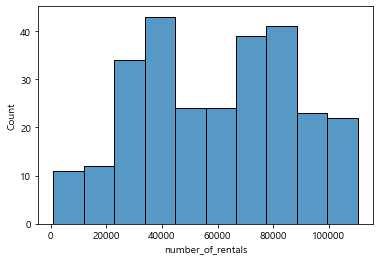

In [65]:
sns.histplot(x='number_of_rentals', data=df)

In [75]:
ddd = df[['sky_condition','precipitation_form','wind_speed','humidity','low_temp','high_temp','Precipitation_Probability','number_of_rentals']]
ddd

,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,4.000,0,3.050,75.000,12.600,21.000,30.000,22994
1,2.950,0,3.278,69.833,12.812,19.000,19.500,28139
2,2.911,0,2.690,74.879,10.312,15.316,19.113,26817
3,3.692,0,3.138,71.849,8.312,12.368,43.493,26034
4,4.000,0,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...
268,3.980,0,2.271,78.378,20.500,27.526,36.486,96150
269,2.865,0,1.794,78.412,20.812,28.842,21.081,107001
270,1.730,0,1.820,72.736,21.000,29.053,7.297,98568
271,2.257,0,2.043,70.473,19.625,26.000,15.541,70053


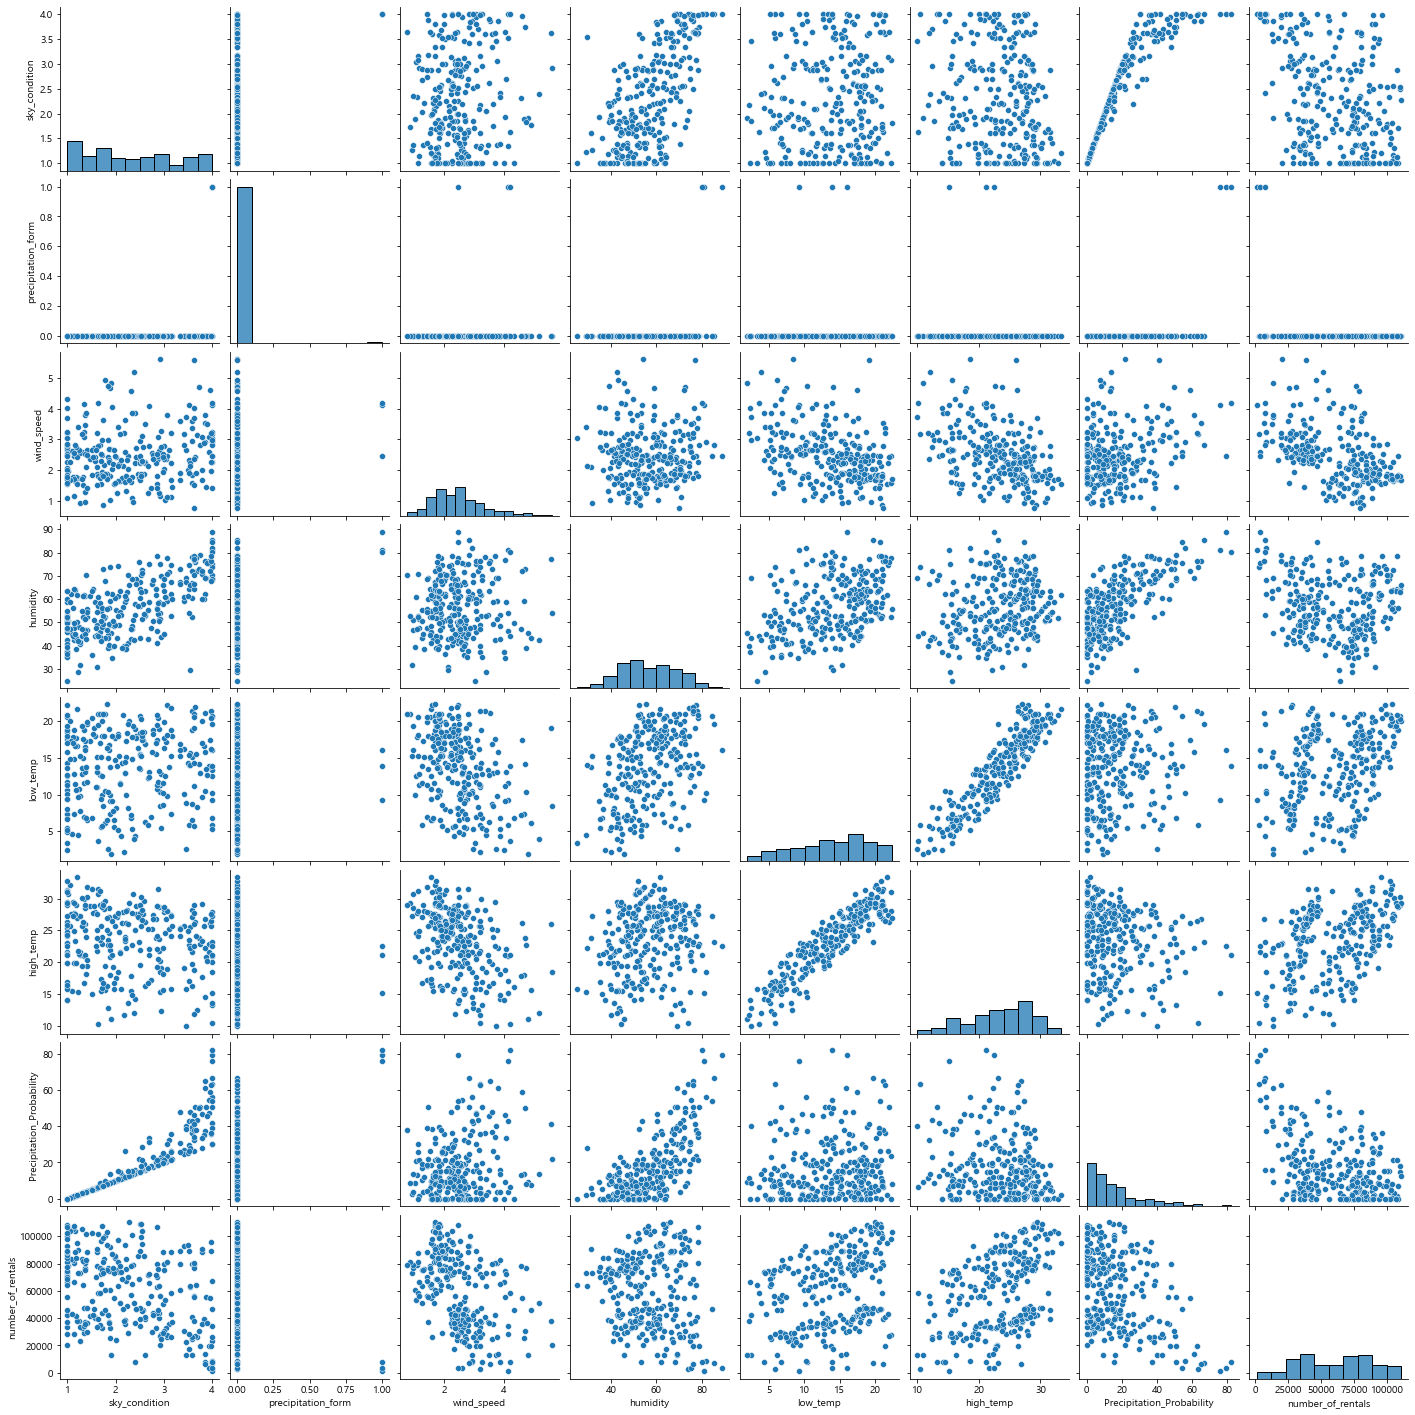

In [76]:
sns.pairplot(ddd)